### Introduction to Supervised Machine Learning

#### What is Machine Learning?

<img src = "introduction.jpg">
<img src = "introduction1.jpg">
<img src = "introduction2.jpg">
<img src = "introduction3.jpg">

#### Types of Machine Learning

<img src = "Types.jpg">
<img src = "Types1.jpg">
<img src = "Types2.jpg">
<img src = "Types3.jpg">
<img src = "Types4.jpg">
<img src = "Types5.jpg">
<img src = "Types6.jpg">
<img src = "Types7.jpg">
<img src = "Types8.jpg">
<img src = "Types9.jpg">

#### Supervised Machine Learning for Interpretation and Prediction

<img src = "Interpretation and Prediction.jpg">
<img src = "Interpretation and Prediction1.jpg">
<img src = "Interpretation and Prediction2.jpg">
<img src = "Interpretation and Prediction3.jpg">
<img src = "Interpretation and Prediction4.jpg">
<img src = "Interpretation and Prediction5.jpg">
<img src = "Interpretation and Prediction6.jpg">
<img src = "Interpretation and Prediction7.jpg">
<img src = "Interpretation and Prediction8.jpg">
<img src = "Interpretation and Prediction9.jpg">

#### Exaamples of Regression vs Classification

<img src = "Examples.jpg">
<img src = "Examples1.jpg">
<img src = "Examples2.jpg">
<img src = "Examples3.jpg">
<img src = "Examples4.jpg">
<img src = "Examples5.jpg">
<img src = "Examples6.jpg">

### Linear Regression

#### Introduction to Linear Regression

<img src = "Linear Regression.jpg">
<img src = "Linear Regression1.jpg">
<img src = "Linear Regression2.jpg">
<img src = "Linear Regression3.jpg">
<img src = "Linear Regression4.jpg">
<img src = "Linear Regression5.jpg">
<img src = "Linear Regression6.jpg">
<img src = "Linear Regression7.jpg">
<img src = "Linear Regression8.jpg">

# Machine Learning Foundation

## Section 2, Part a: Regression Intro: Transforming Target 

## Learning objectives

By the end of this lesson, you will be able to:

* Apply transformations to make target variable more normally distributed for regression
* Apply inverse transformations to be able to use these in a regression context

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

np.random.seed(72018)

from sklearn.datasets import load_boston

def to_2d(array):
    return array.reshape(array.shape[0], -1)

def boston_dataframe(description=False):
    boston = load_boston()
    
    data = boston.data
    target = boston.target
    names = boston.feature_names
    
    target = to_2d(target)
    
    data_all = np.concatenate([data, target], axis=1)
    names_all = np.concatenate([names, np.array(['MEDV'])], axis=0)
    
    if description:
        
        return pd.DataFrame(data=data_all, columns=names_all), boston.DESCR
    
    else: 
        
        return pd.DataFrame(data=data_all, columns=names_all)
    
def plot_exponential_data():
    data = np.exp(np.random.normal(size=1000))
    plt.hist(data)
    plt.show()
    return data
    
def plot_square_normal_data():
    data = np.square(np.random.normal(loc=5, size=1000))
    plt.hist(data)
    plt.show()
    return data

In [2]:
import warnings
warnings.simplefilter("ignore")

### Loading in Boston Data

In [3]:
boston_data = boston_dataframe()

In [4]:
boston_data.head(15)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5.0,311.0,15.2,386.71,17.10,18.9


### Determining Normality

Making our target variable normally distributed often will lead to better results

If our target is not normally distributed, we can apply a transformation to it and then fit our regression to predict the transformed values.

How can we tell if our target is normally distributed? There are two ways:

* Visually
* Using a statistical test

#### Visually

Plotting a histogram:

<AxesSubplot:>

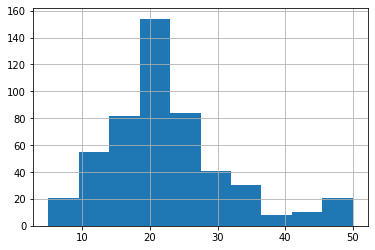

In [5]:
boston_data.MEDV.hist()

Does not look normal due to that right tail. Let's try to verify statistically:

In [6]:
from scipy.stats.mstats import normaltest # D'Agostino K^2 Test

Without getting into Bayesian vs. frequentist debates, for the purposes of this lesson, the following will suffice:

* This is a statistical test that tests whether a distribution is normally distributed or not. It isn't perfect, but suffice it to say: 
    * This test outputs a "p-value". The _higher_ this p-value is the _closer_ the distribution is to normal.
    * Frequentist statisticians would say that you accept that the distribution is normal (more specifically: fail to reject the null hypothesis that it is normal) if p > 0.05.

In [7]:
normaltest(boston_data.MEDV.values)

NormaltestResult(statistic=90.9746873700967, pvalue=1.7583188871696095e-20)

p-value _extremely_ low. Our y variable we've been dealing with this whole time was not normally distributed!

Linear Regression assumes a normally distributed residuals which can be aided by transforming y variable. Let's try some common transformations to try and get y to be normally distributed: 

* Log
* Square root
* Box cox

### Testing log

The log transform can transform data that is significantly skewed right to be more normally distributed:

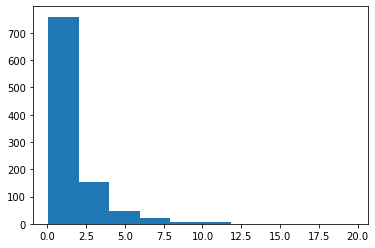

In [8]:
data = plot_exponential_data()

(array([  8.,  33.,  83., 182., 215., 217., 153.,  74.,  31.,   4.]),
 array([-2.84528637, -2.26277091, -1.68025545, -1.09773998, -0.51522452,
         0.06729094,  0.6498064 ,  1.23232187,  1.81483733,  2.39735279,
         2.97986826]),
 <BarContainer object of 10 artists>)

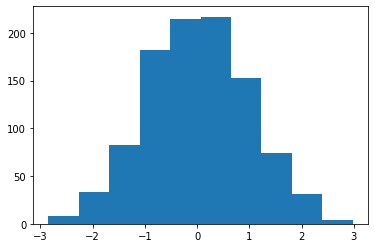

In [9]:
plt.hist(np.log(data))

**Apply transform to Boston data:**

In [10]:
log_medv = np.log(boston_data.MEDV)

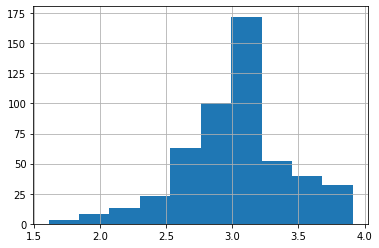

In [11]:
log_medv.hist()

In [12]:
normaltest(log_medv)

NormaltestResult(statistic=17.21801696640697, pvalue=0.00018245472768345307)

Conclusion: closer, but still not normal.

### Exercise: 

The square root transformation is another transformation that can transform non-normally distributed data into normally distributed data:

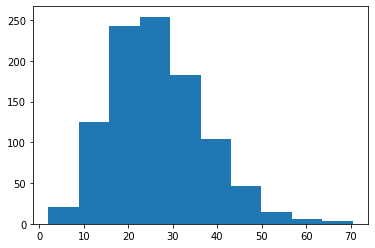

In [13]:
data = plot_square_normal_data()

Slightly skewed right.

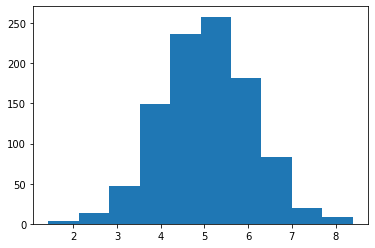

In [14]:
plt.hist(np.sqrt(data));

Apply the square root transformation to the Boston data target and test whether the result is normally distributed.

(array([  9.,  18.,  40.,  67., 131., 121.,  48.,  36.,  10.,  26.]),
 array([2.23606798, 2.71956796, 3.20306794, 3.68656793, 4.17006791,
        4.65356789, 5.13706788, 5.62056786, 6.10406784, 6.58756783,
        7.07106781]),
 <BarContainer object of 10 artists>)

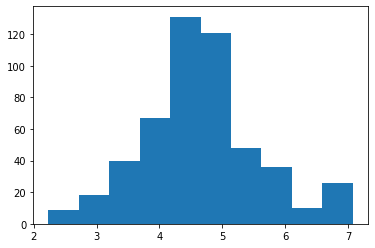

In [15]:
# Instructor Solution

sqrt_medv = np.sqrt(boston_data.MEDV)
plt.hist(sqrt_medv)

In [16]:
normaltest(sqrt_medv)

NormaltestResult(statistic=20.487090826863067, pvalue=3.558645701429252e-05)

### Box cox

The box cox transformation is a parametrized transformation that tries to get distributions "as close to a normal distribution as possible".

It is defined as:

$$ \text{boxcox}(y_i) = \frac{y_i^{\lambda} - 1}{\lambda} $$

You can think of as a generalization of the square root function: the square root function uses the exponent of 0.5, but box cox lets its exponent vary so it can find the best one.

In [17]:
from scipy.stats import boxcox

In [18]:
bc_result = boxcox(boston_data.MEDV)
boxcox_medv = bc_result[0]
lam = bc_result[1]

In [19]:
lam

0.2166209012915364

<AxesSubplot:>

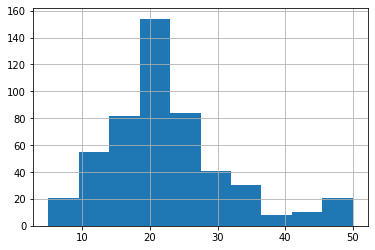

In [20]:
boston_data['MEDV'].hist()

(array([  4.,  15.,  17.,  49.,  68., 151.,  99.,  50.,  23.,  30.]),
 array([1.92564954, 2.3487372 , 2.77182485, 3.1949125 , 3.61800016,
        4.04108781, 4.46417546, 4.88726311, 5.31035077, 5.73343842,
        6.15652607]),
 <BarContainer object of 10 artists>)

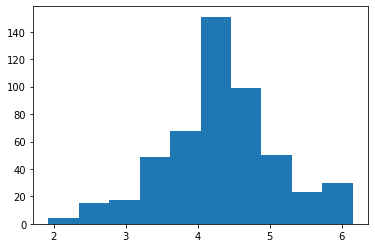

In [21]:
plt.hist(boxcox_medv)

In [22]:
normaltest(boxcox_medv)

NormaltestResult(statistic=4.513528775533045, pvalue=0.1046886692817602)

Significantly more normally distributed (according to p value) than the other two distributions - above 0.05, even!

Now that we have a normally distributed y-variable, let's try a regression!

### Testing regression:

In [23]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import (StandardScaler, 
                                   PolynomialFeatures)

In [24]:
lr = LinearRegression()

**Reload clean version of `boston_data`:**

In [25]:
boston_data = boston_dataframe()

Same steps as before.

**Create X and y**

In [26]:
y_col = "MEDV"

X = boston_data.drop(y_col, axis=1)
y = boston_data[y_col]

**Create Polynomial Features**

In [27]:
pf = PolynomialFeatures(degree=2, include_bias=False)
X_pf = pf.fit_transform(X)

**Train test split**

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X_pf, y, test_size=0.3, 
                                                    random_state=72018)

**Fit `StandardScaler` on `X_train` as before**

In [29]:
s = StandardScaler()
X_train_s = s.fit_transform(X_train)

**Discuss: what transformation do we need to apply next?**

Apply the appropriate transformation.

In [30]:
# Instructor Solution
bc_result2 = boxcox(y_train)
y_train_bc = bc_result2[0]
lam2 = bc_result2[1]

As before, we'll now:

1. Fit regression
1. Transform testing data
1. Predict on testing data

In [31]:
y_train_bc.shape

(354,)

In [32]:
lr.fit(X_train_s, y_train_bc)
X_test_s = s.transform(X_test)
y_pred_bc = lr.predict(X_test_s)

### Discussion

* Are we done?
* What did we predict?
* How would you interpret these predictions?

#### Inverse transform

Every transformation has an inverse transformation. The inverse transformation of $f(x) = \sqrt{x}$ is $f^{-1}(x) = x^2$, for example. Box cox has an inverse transformation as well: notice that we have to pass in the lambda value that we found from before:

In [33]:
from scipy.special import inv_boxcox

In [38]:
# code from above
bc_result = boxcox(boston_data.MEDV)
boxcox_medv = bc_result[0]
lam = bc_result[1]

In [39]:
inv_boxcox(boxcox_medv, lam)[:10]

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9])

In [40]:
boston_data['MEDV'].values[:10]

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9])

Exactly the same, as we would hope!

### Exercise:

1. Apply the appropriate inverse transformation to `y_pred_bc`.
2. Calculate the $R^2$ using the result of this inverse transformation and `y_test`.  

**Hint:** Should be two lines of code.

In [41]:
# Instructor Solution
y_pred_tran = inv_boxcox(y_pred_bc,lam2)
r2_score(y_pred_tran,y_test)

0.8794001851338585

## LAB Exercise: 

### Determine the R^2 of a LinearRegression without the box cox transformation. Is it higher or lower?

In [42]:
### BEGIN SOLUTION
lr = LinearRegression()
lr.fit(X_train_s,y_train)
lr_pred = lr.predict(X_test_s)
r2_score(lr_pred,y_test)
### END SOLUTION

0.8555202098064162

---

### Data splits and cross validation

#### Training and tes splits

<img src = "Test Train Splits.jpg">
<img src = "Test Train Splits1.jpg">
<img src = "Test Train Splits2.jpg">
<img src = "Test Train Splits3.jpg">
<img src = "Test Train Splits4.jpg">
<img src = "Test Train Splits5.jpg">
<img src = "Test Train Splits6.jpg">

# Machine Learning Foundation

## Course 2, Part b: Regression Setup, Train-test Split LAB 

## Introduction

We will be working with a data set based on [housing prices in Ames, Iowa](https://www.kaggle.com/c/house-prices-advanced-regression-techniques). It was compiled for educational use to be a modernized and expanded alternative to the well-known Boston Housing dataset. This version of the data set has had some missing values filled for convenience.

There are an extensive number of features, so they've been described in the table below.

### Predictor

* SalePrice: The property's sale price in dollars. 

### Features

* MoSold: Month Sold
* YrSold: Year Sold   
* SaleType: Type of sale
* SaleCondition: Condition of sale
* MSSubClass: The building class
* MSZoning: The general zoning classification
* ...

## Question 1

* Import the data using Pandas and examine the shape. There are 79 feature columns plus the predictor, the sale price (`SalePrice`). 
* There are three different types: integers (`int64`), floats (`float64`), and strings (`object`, categoricals). Examine how many there are of each data type. 

In [45]:
import pandas as pd
import numpy as np

# Import the data using the file path
filepath = 'Ames_Housing_Sales.csv'
data = pd.read_csv(filepath, sep=',')

print(data.shape)

(1379, 80)


In [46]:
data.dtypes.value_counts()

object     43
float64    21
int64      16
dtype: int64

## Question 2

A significant challenge, particularly when dealing with data that have many columns, is ensuring each column gets encoded correctly. 

This is particularly true with data columns that are ordered categoricals (ordinals) vs unordered categoricals. Unordered categoricals should be one-hot encoded, however this can significantly increase the number of features and creates features that are highly correlated with each other.

Determine how many total features would be present, relative to what currently exists, if all string (object) features are one-hot encoded. Recall that the total number of one-hot encoded columns is `n-1`, where `n` is the number of categories.

In [47]:
# Select the object (string) columns
mask = data.dtypes == np.object
categorical_cols = data.columns[mask]

In [48]:
# Determine how many extra columns would be created
num_ohc_cols = (data[categorical_cols]
                .apply(lambda x: x.nunique())
                .sort_values(ascending=False))


# No need to encode if there is only one value
small_num_ohc_cols = num_ohc_cols.loc[num_ohc_cols>1]

# Number of one-hot columns is one less than the number of categories
small_num_ohc_cols -= 1

# This is 215 columns, assuming the original ones are dropped. 
# This is quite a few extra columns!
small_num_ohc_cols.sum()

215

## Question 3

Let's create a new data set where all of the above categorical features will be one-hot encoded. We can fit this data and see how it affects the results.

* Used the dataframe `.copy()` method to create a completely separate copy of the dataframe for one-hot encoding
* On this new dataframe, one-hot encode each of the appropriate columns and add it back to the dataframe. Be sure to drop the original column.
* For the data that are not one-hot encoded, drop the columns that are string categoricals.

For the first step, numerically encoding the string categoricals, either Scikit-learn;s `LabelEncoder` or `DictVectorizer` can be used. However, the former is probably easier since it doesn't require specifying a numerical value for each category, and we are going to one-hot encode all of the numerical values anyway. (Can you think of a time when `DictVectorizer` might be preferred?)

In [49]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

# Copy of the data
data_ohc = data.copy()

# The encoders
le = LabelEncoder()
ohc = OneHotEncoder()

for col in num_ohc_cols.index:
    
    # Integer encode the string categories
    dat = le.fit_transform(data_ohc[col]).astype(np.int)
    
    # Remove the original column from the dataframe
    data_ohc = data_ohc.drop(col, axis=1)

    # One hot encode the data--this returns a sparse array
    new_dat = ohc.fit_transform(dat.reshape(-1,1))

    # Create unique column names
    n_cols = new_dat.shape[1]
    col_names = ['_'.join([col, str(x)]) for x in range(n_cols)]

    # Create the new dataframe
    new_df = pd.DataFrame(new_dat.toarray(), 
                          index=data_ohc.index, 
                          columns=col_names)

    # Append the new data to the dataframe
    data_ohc = pd.concat([data_ohc, new_df], axis=1)

In [50]:
# Column difference is as calculated above
data_ohc.shape[1] - data.shape[1]

215

In [51]:
print(data.shape[1])

# Remove the string columns from the dataframe
data = data.drop(num_ohc_cols.index, axis=1)

print(data.shape[1])

80
37


## Question 4

* Create train and test splits of both data sets. To ensure the data gets split the same way, use the same `random_state` in each of the two splits.
* For each data set, fit a basic linear regression model on the training data. 
* Calculate the mean squared error on both the train and test sets for the respective models. Which model produces smaller error on the test data and why?

In [57]:
from sklearn.model_selection import train_test_split

y_col = 'SalePrice'

# Split the data that is not one-hot encoded
feature_cols = [x for x in data.columns if x != y_col]
X_data = data[feature_cols]
y_data = data[y_col]

X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, 
                                                    test_size=0.3, random_state=42)
# Split the data that is one-hot encoded
feature_cols = [x for x in data_ohc.columns if x != y_col]
X_data_ohc = data_ohc[feature_cols]
y_data_ohc = data_ohc[y_col]

X_train_ohc, X_test_ohc, y_train_ohc, y_test_ohc = train_test_split(X_data_ohc, y_data_ohc, 
                                                    test_size=0.3, random_state=42)

In [59]:
X_data

,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BsmtFinSF1,BsmtFinSF2,BsmtFullBath,BsmtHalfBath,BsmtUnfSF,EnclosedPorch,...,OverallCond,OverallQual,PoolArea,ScreenPorch,TotRmsAbvGrd,TotalBsmtSF,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
0,856.0,854.0,0.0,3,706.0,0.0,1,0,150.0,0.0,...,5,7,0.0,0.0,8,856.0,0.0,2003,2003,2008
1,1262.0,0.0,0.0,3,978.0,0.0,0,1,284.0,0.0,...,8,6,0.0,0.0,6,1262.0,298.0,1976,1976,2007
2,920.0,866.0,0.0,3,486.0,0.0,1,0,434.0,0.0,...,5,7,0.0,0.0,6,920.0,0.0,2001,2002,2008
3,961.0,756.0,0.0,3,216.0,0.0,1,0,540.0,272.0,...,5,7,0.0,0.0,7,756.0,0.0,1915,1970,2006
4,1145.0,1053.0,0.0,4,655.0,0.0,1,0,490.0,0.0,...,5,8,0.0,0.0,9,1145.0,192.0,2000,2000,2008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1374,953.0,694.0,0.0,3,0.0,0.0,0,0,953.0,0.0,...,5,6,0.0,0.0,7,953.0,0.0,1999,2000,2007
1375,2073.0,0.0,0.0,3,790.0,163.0,1,0,589.0,0.0,...,6,6,0.0,0.0,7,1542.0,349.0,1978,1988,2010
1376,1188.0,1152.0,0.0,4,275.0,0.0,0,0,877.0,0.0,...,9,7,0.0,0.0,9,1152.0,0.0,1941,2006,2010
1377,1078.0,0.0,0.0,2,49.0,1029.0,1,0,0.0,112.0,...,6,5,0.0,0.0,5,1078.0,366.0,1950,1996,2010


In [60]:
y_data

0       208500.0
1       181500.0
2       223500.0
3       140000.0
4       250000.0
          ...   
1374    175000.0
1375    210000.0
1376    266500.0
1377    142125.0
1378    147500.0
Name: SalePrice, Length: 1379, dtype: float64

In [61]:
X_data_ohc

,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BsmtFinSF1,BsmtFinSF2,BsmtFullBath,BsmtHalfBath,BsmtUnfSF,EnclosedPorch,...,LandSlope_2,PavedDrive_0,PavedDrive_1,PavedDrive_2,CentralAir_0,CentralAir_1,Street_0,Street_1,Utilities_0,Utilities_1
0,856.0,854.0,0.0,3,706.0,0.0,1,0,150.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0
1,1262.0,0.0,0.0,3,978.0,0.0,0,1,284.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0
2,920.0,866.0,0.0,3,486.0,0.0,1,0,434.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0
3,961.0,756.0,0.0,3,216.0,0.0,1,0,540.0,272.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0
4,1145.0,1053.0,0.0,4,655.0,0.0,1,0,490.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1374,953.0,694.0,0.0,3,0.0,0.0,0,0,953.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0
1375,2073.0,0.0,0.0,3,790.0,163.0,1,0,589.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0
1376,1188.0,1152.0,0.0,4,275.0,0.0,0,0,877.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0
1377,1078.0,0.0,0.0,2,49.0,1029.0,1,0,0.0,112.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0


In [62]:
y_data_ohc

0       208500.0
1       181500.0
2       223500.0
3       140000.0
4       250000.0
          ...   
1374    175000.0
1375    210000.0
1376    266500.0
1377    142125.0
1378    147500.0
Name: SalePrice, Length: 1379, dtype: float64

In [58]:
# Compare the indices to ensure they are identical
(X_train_ohc.index == X_train.index).all()

True

In [64]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

LR = LinearRegression()

# Storage for error values
error_df = list()

# Data that have not been one-hot encoded
LR = LR.fit(X_train, y_train)
y_train_pred = LR.predict(X_train)
y_test_pred = LR.predict(X_test)

error_df.append(pd.Series({'train': mean_squared_error(y_train, y_train_pred),
                           'test' : mean_squared_error(y_test,  y_test_pred)},
                           name='no enc'))

# Data that have been one-hot encoded
LR = LR.fit(X_train_ohc, y_train_ohc)
y_train_ohc_pred = LR.predict(X_train_ohc)
y_test_ohc_pred = LR.predict(X_test_ohc)

error_df.append(pd.Series({'train': mean_squared_error(y_train_ohc, y_train_ohc_pred),
                           'test' : mean_squared_error(y_test_ohc,  y_test_ohc_pred)},
                          name='one-hot enc'))

# Assemble the results
error_df = pd.concat(error_df, axis=1)
error_df

,no enc,one-hot enc
train,1.131507e+09,3.177267e+08
test,1.372182e+09,2.118527e+13


Note that the error values on the one-hot encoded data are very different for the train and test data. In particular, the errors on the test data are much higher. Based on the lecture, this is because the one-hot encoded model is overfitting the data. We will learn how to deal with issues like this in the next lesson.

## Question 5

For each of the data sets (one-hot encoded and not encoded):

* Scale the all the non-hot encoded values using one of the following: `StandardScaler`, `MinMaxScaler`, `MaxAbsScaler`.
* Compare the error calculated on the test sets

Be sure to calculate the skew (to decide if a transformation should be done) and fit the scaler on *ONLY* the training data, but then apply it to both the train and test data identically.

In [ ]:
# Mute the setting wtih a copy warnings
pd.options.mode.chained_assignment = None

In [67]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, MaxAbsScaler


scalers = {'standard': StandardScaler(),
           'minmax': MinMaxScaler(),
           'maxabs': MaxAbsScaler()}

training_test_sets = {
    'not_encoded': (X_train, y_train, X_test, y_test),
    'one_hot_encoded': (X_train_ohc, y_train_ohc, X_test_ohc, y_test_ohc)}


# Get the list of float columns, and the float data
# so that we don't scale something we already scaled. 
# We're supposed to scale the original data each time
mask = X_train.dtypes == np.float
float_columns = X_train.columns[mask]

# initialize model
LR = LinearRegression()

# iterate over all possible combinations and get the errors
errors = {}
for encoding_label, (_X_train, _y_train, _X_test, _y_test) in training_test_sets.items():
    for scaler_label, scaler in scalers.items():
        trainingset = _X_train.copy()  # copy because we dont want to scale this more than once.
        testset = _X_test.copy()
        trainingset[float_columns] = scaler.fit_transform(trainingset[float_columns])
        testset[float_columns] = scaler.transform(testset[float_columns])
        LR.fit(trainingset, _y_train)
        predictions = LR.predict(testset)
        key = encoding_label + ' - ' + scaler_label + 'scaling'
        errors[key] = mean_squared_error(_y_test, predictions)

errors = pd.Series(errors)
print(errors.to_string())
print('-' * 80)
for key, error_val in errors.items():
    print(key, error_val)

not_encoded - standardscaling        1.372182e+09
not_encoded - minmaxscaling          1.372161e+09
not_encoded - maxabsscaling          1.372690e+09
one_hot_encoded - standardscaling    2.113720e+25
one_hot_encoded - minmaxscaling      8.065328e+09
one_hot_encoded - maxabsscaling      8.065328e+09
--------------------------------------------------------------------------------
not_encoded - standardscaling 1372182358.934517
not_encoded - minmaxscaling 1372161072.9472709
not_encoded - maxabsscaling 1372690259.2411048
one_hot_encoded - standardscaling 2.1137201588936723e+25
one_hot_encoded - minmaxscaling 8065327607.226308
one_hot_encoded - maxabsscaling 8065327607.221028


## Question 6

Plot predictions vs actual for one of the models.

[Text(0.5, 0, 'Ground truth'),
 Text(0, 0.5, 'Predictions'),
 Text(0.5, 1.0, 'Ames, Iowa House Price Predictions vs Truth, using Linear Regression')]

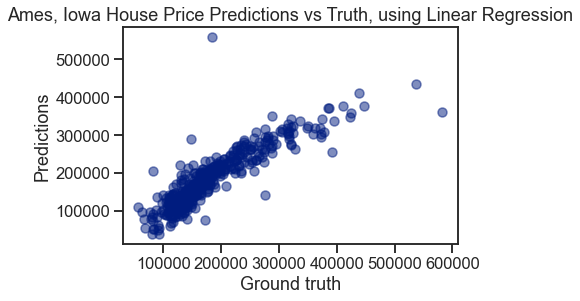

In [66]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


sns.set_context('talk')
sns.set_style('ticks')
sns.set_palette('dark')

ax = plt.axes()
# we are going to use y_test, y_test_pred
ax.scatter(y_test, y_test_pred, alpha=.5)

ax.set(xlabel='Ground truth', 
       ylabel='Predictions',
       title='Ames, Iowa House Price Predictions vs Truth, using Linear Regression')

### Cross Validation

<img src = "Cross Validation.jpg">
<img src = "Cross Validation1.jpg">
<img src = "Cross Validation2.jpg">
<img src = "Cross Validation3.jpg">
<img src = "Cross Validation4.jpg">
<img src = "Cross Validation5.jpg">
<img src = "Cross Validation6.jpg">
<img src = "Cross Validation7.jpg">
<img src = "Cross Validation8.jpg">
<img src = "Cross Validation9.jpg">
<img src = "Cross Validation10.jpg">

# Machine Learning Foundation

## Section 2, Part c: Cross Validation 

## Learning objectives

By the end of this lesson, you will be able to:

* Chain multiple data processing steps together using `Pipeline`
* Use the `KFolds` object to split data into multiple folds.
* Perform cross validation using SciKit Learn with `cross_val_predict` and `GridSearchCV`


In [68]:
import numpy as np
import pickle
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import KFold, cross_val_predict
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import r2_score
from sklearn.pipeline import Pipeline

In [70]:
# Note we are loading a slightly different ("cleaned") pickle file
boston = pickle.load(open('boston_housing_clean.pickle', "rb" ))

In [71]:
boston.keys()

dict_keys(['dataframe', 'description'])

In [72]:
boston_data = boston['dataframe']
boston_description = boston['description']

In [73]:
boston_data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


### Discussion: 

Suppose we want to do Linear Regression on our dataset to get an estimate, based on mean squared error, of how well our model will perform on data outside our dataset. 

Suppose also that our data is split into three folds: Fold 1, Fold 2, and Fold 3.

What would the steps be, in English, to do this?

#### Coding this up

The [`KFold`](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html) object in SciKit Learn tells the cross validation object (see below) how to split up the data:

In [74]:
X = boston_data.drop('MEDV', axis=1)
y = boston_data.MEDV

In [75]:
kf = KFold(shuffle=True, random_state=72018, n_splits=3)

In [76]:
for train_index, test_index in kf.split(X):
    print("Train index:", train_index[:10], len(train_index))
    print("Test index:",test_index[:10], len(test_index))
    print('')

Train index: [ 1  3  4  5  7  8 10 11 12 13] 337
Test index: [ 0  2  6  9 15 17 19 23 25 26] 169

Train index: [ 0  2  6  9 10 11 12 13 15 17] 337
Test index: [ 1  3  4  5  7  8 14 16 22 27] 169

Train index: [0 1 2 3 4 5 6 7 8 9] 338
Test index: [10 11 12 13 18 20 21 24 28 31] 168



In [77]:
#from sklearn.metrics import r2_score, mean_squared_error

scores = []
lr = LinearRegression()

for train_index, test_index in kf.split(X):
    X_train, X_test, y_train, y_test = (X.iloc[train_index, :], 
                                        X.iloc[test_index, :], 
                                        y[train_index], 
                                        y[test_index])
    
    lr.fit(X_train, y_train)
        
    y_pred = lr.predict(X_test)

    score = r2_score(y_test.values, y_pred)
    
    scores.append(score)
    
scores

[0.6719348798472764, 0.7485020059212382, 0.6976807323597768]

A bit cumbersome, but do-able.

### Discussion (Part 2): 

Now suppose we want to do the same, but appropriately scaling our data as we go through the folds.

What would the steps be _now_?

### Coding this up

In [78]:
scores = []

lr = LinearRegression()
s = StandardScaler()

for train_index, test_index in kf.split(X):
    X_train, X_test, y_train, y_test = (X.iloc[train_index, :], 
                                        X.iloc[test_index, :], 
                                        y[train_index], 
                                        y[test_index])
    
    X_train_s = s.fit_transform(X_train)
    
    lr.fit(X_train_s, y_train)
    
    X_test_s = s.transform(X_test)
    
    y_pred = lr.predict(X_test_s)

    score = r2_score(y_test.values, y_pred)
    
    scores.append(score)

In [79]:
scores

[0.6719348798472715, 0.748502005921238, 0.6976807323597743]

(same scores, because for vanilla linear regression with no regularization, scaling actually doesn't matter for performance)

This is getting quite cumbersome! 

_Very_ luckily, SciKit Learn has some wonderful functions that handle a lot of this for us.

### `Pipeline` and `cross_val_predict`

`Pipeline` lets you chain together multiple operators on your data that both have a `fit` method.

In [80]:
s = StandardScaler()
lr = LinearRegression()

### Combine multiple processing steps into a `Pipeline`

A pipeline contains a series of steps, where a step is ("name of step", actual_model). The "name of step" string is only used to help you identify which step you are on, and to allow you to specify parameters at that step.  

In [81]:
estimator = Pipeline([("scaler", s),
                      ("regression", lr)])

### `cross_val_predict`

[`cross_val_predict`](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_predict.html) is a function that does K-fold cross validation for us, appropriately fitting and transforming at every step of the way.

In [82]:
kf

KFold(n_splits=3, random_state=72018, shuffle=True)

In [83]:
predictions = cross_val_predict(estimator, X, y, cv=kf)

In [84]:
r2_score(y, predictions)

0.706353106416156

In [85]:
np.mean(scores) # almost identical!

0.7060392060427613

Note that `cross_val_predict` doesn't use the same model for all steps; the predictions for each row are made when that row is in the validation set. We really have the collected results of 3 (i.e. `kf.num_splits`) different models. 

When we are done, `estimator` is still not fitted. If we want to predict on _new_ data, we still have to train our `estimator`. 

## Hyperparameter tuning

### Definition

**Hyperparameter tuning** involves using cross validation (or train-test split) to determine which hyperparameters are most likely to generate a model that _generalizes_ well outside of your sample.

### Mechanics

We can generate an exponentially spaces range of values using the numpy [`geomspace`](https://docs.scipy.org/doc/numpy/reference/generated/numpy.geomspace.html#numpy.geomspace) function.

```python
np.geomspace(1, 1000, num=4)
```

produces:

```
array([    1.,    10.,   100.,  1000.])
```

Use this function to generate a list of length 10 called `alphas` for hyperparameter tuning:

In [88]:
alphas = np.geomspace(1e-9, 1e0, num=10)
alphas

array([1.e-09, 1.e-08, 1.e-07, 1.e-06, 1.e-05, 1.e-04, 1.e-03, 1.e-02,
       1.e-01, 1.e+00])

The code below tunes the `alpha` hyperparameter for Lasso regression.

In [89]:
scores = []
coefs = []
for alpha in alphas:
    las = Lasso(alpha=alpha, max_iter=100000)
    
    estimator = Pipeline([
        ("scaler", s),
        ("lasso_regression", las)])

    predictions = cross_val_predict(estimator, X, y, cv = kf)
    
    score = r2_score(y, predictions)
    
    scores.append(score)

In [90]:
list(zip(alphas,scores))

[(1e-09, 0.7063531064981925),
 (1e-08, 0.7063531072356071),
 (1e-07, 0.7063531145602442),
 (1e-06, 0.7063531882052063),
 (1e-05, 0.7063539165191507),
 (0.0001, 0.706361268093463),
 (0.001, 0.7064334670415461),
 (0.01, 0.7070865958083233),
 (0.1, 0.705838151167185),
 (1.0, 0.6512724532884888)]

In [91]:
Lasso(alpha=1e-6).fit(X, y).coef_

array([-1.07170372e-01,  4.63952623e-02,  2.08588308e-02,  2.68854318e+00,
       -1.77954207e+01,  3.80475296e+00,  7.50802707e-04, -1.47575348e+00,
        3.05654279e-01, -1.23293755e-02, -9.53459908e-01,  9.39253013e-03,
       -5.25467196e-01])

In [92]:
Lasso(alpha=1.0).fit(X, y).coef_

array([-0.06342255,  0.04916867, -0.        ,  0.        , -0.        ,
        0.94678567,  0.02092737, -0.66900864,  0.26417501, -0.01520915,
       -0.72319901,  0.00829117, -0.76143296])

Text(0, 0.5, '$R^2$')

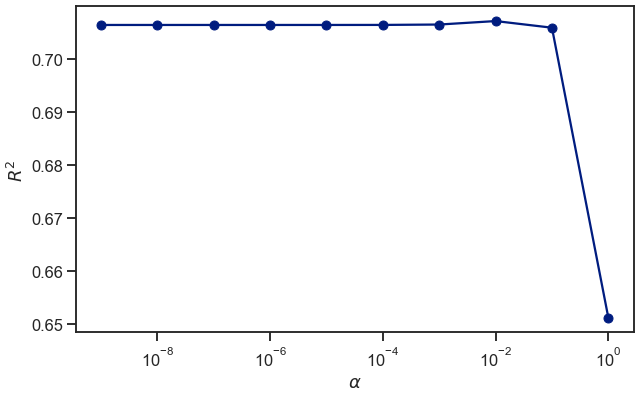

In [93]:
plt.figure(figsize=(10,6))
plt.semilogx(alphas, scores, '-o')
plt.xlabel('$\\alpha$')
plt.ylabel('$R^2$')

### Exercise

Add `PolynomialFeatures` to this `Pipeline`, and re-run the cross validation with the `PolynomialFeatures` added.

**Hint #1:** pipelines process input from first to last. Think about the order that it would make sense to add Polynomial Features to the data in sequence and add them in the appropriate place in the pipeline.

**Hint #2:** you should see a significant increase in cross validation accuracy from doing this

In [94]:
pf = PolynomialFeatures(degree=3)

scores = []
alphas = np.geomspace(0.06, 6.0, 20)
for alpha in alphas:
    las = Lasso(alpha=alpha, max_iter=100000)
    
    estimator = Pipeline([
        ("scaler", s),
        ("make_higher_degree", pf),
        ("lasso_regression", las)])

    predictions = cross_val_predict(estimator, X, y, cv = kf)
    
    score = r2_score(y, predictions)
    
    scores.append(score)
    

In [96]:
scores

[0.8109754662476154,
 0.8224863637940226,
 0.8230573042903306,
 0.8143160953048915,
 0.8044446338622657,
 0.7942423307179223,
 0.7837829963261633,
 0.7762405981594626,
 0.77008630147054,
 0.7696545891092781,
 0.7629213902351794,
 0.746362920338825,
 0.7222912862089705,
 0.695253921882193,
 0.6715160557453473,
 0.6324054431232764,
 0.580589840077772,
 0.5046557947726654,
 0.41425023203661404,
 0.3800935078061405]

If you store the results in a list called `scores`, the following will work:

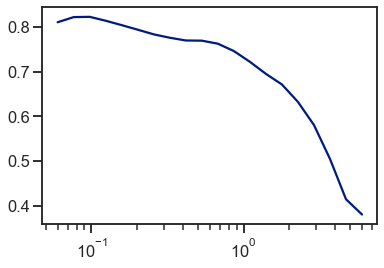

In [97]:
plt.semilogx(alphas, scores)

In [98]:
# Once we have found the hyperparameter (alpha~1e-2=0.01)
# make the model and train it on ALL the data
# Then release it into the wild .....
best_estimator = Pipeline([
                    ("scaler", s),
                    ("make_higher_degree", PolynomialFeatures(degree=2)),
                    ("lasso_regression", Lasso(alpha=0.03))])

best_estimator.fit(X, y)
best_estimator.score(X, y)

0.9134777735196521

In [99]:
best_estimator.named_steps["lasso_regression"].coef_

array([ 0.00000000e+00, -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
        0.00000000e+00, -1.00309168e+00,  3.32679107e+00, -1.01840878e+00,
       -2.56161421e+00,  1.12778302e+00, -1.72266155e+00, -5.37088506e-01,
        4.39555878e-01, -3.39542586e+00,  7.22387712e-02,  0.00000000e+00,
        0.00000000e+00,  3.53653554e+00, -0.00000000e+00,  3.72285440e-01,
        0.00000000e+00,  0.00000000e+00, -5.49528703e-01, -0.00000000e+00,
       -0.00000000e+00, -4.05522485e-02,  2.25864611e-01,  1.78508858e-01,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  6.50874606e-02,
       -0.00000000e+00, -2.07295802e-01, -0.00000000e+00,  3.71781995e-01,
        0.00000000e+00, -0.00000000e+00, -5.89531100e-02,  3.47180625e-01,
        0.00000000e+00,  9.23666274e-01,  3.48873365e-01,  7.29463442e-02,
        0.00000000e+00,  0.00000000e+00,  7.68485586e-02, -7.21083596e-01,
        0.00000000e+00, -5.98542558e-01,  4.18420677e-01, -7.98165728e-01,
       -7.25062683e-01,  

### Exercise

Do the same, but with `Ridge` regression 

Which model, `Ridge` or `Lasso`, performs best with its optimal hyperparameters on the Boston dataset?

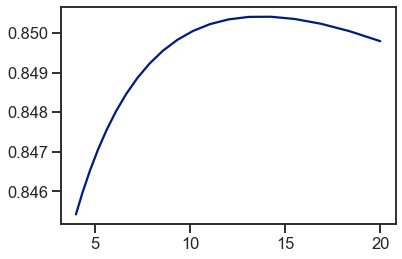

In [102]:
pf = PolynomialFeatures(degree=2)
alphas = np.geomspace(4, 20, 20)
scores=[]
for alpha in alphas:
    ridge = Ridge(alpha=alpha, max_iter=100000)

    estimator = Pipeline([
        ("scaler", s),
        ("polynomial_features", pf),
        ("ridge_regression", ridge)])

    predictions = cross_val_predict(estimator, X, y, cv = kf)
    score = r2_score(y, predictions)
    scores.append(score)

plt.plot(alphas, scores)

**Conclusion:** Both Lasso and Ridge with proper hyperparameter tuning give better results than plain ol' Linear Regression!

### Exercise:

Now, for whatever your best overall hyperparameter was: 

* Standardize the data
* Fit and predict on the entire dataset
* See what the largest coefficients were
    * Hint: use 
    ```python
    dict(zip(model.coef_, pf.get_feature_names()))
    ```
    for your model `model` to get the feature names from `PolynomialFeatures`.
    
    Then, use
    ```python
    dict(zip(list(range(len(X.columns.values))), X.columns.values))
    ```
    
    to see which features in the `PolynomialFeatures` DataFrame correspond to which columns in the original DataFrame.


In [103]:
# Once we have found the hyperparameter (alpha~1e-2=0.01)
# make the model and train it on ALL the data
# Then release it into the wild .....
best_estimator = Pipeline([
                    ("scaler", s),
                    ("make_higher_degree", PolynomialFeatures(degree=2)),
                    ("lasso_regression", Lasso(alpha=0.03))])

best_estimator.fit(X, y)
best_estimator.score(X, y)

0.9134777735196521

In [104]:
df_importances = pd.DataFrame(zip(best_estimator.named_steps["make_higher_degree"].get_feature_names(),
                 best_estimator.named_steps["lasso_regression"].coef_,
))

In [105]:
col_names_dict = dict(zip(list(range(len(X.columns.values))), X.columns.values))

In [106]:
col_names_dict

{0: 'CRIM',
 1: 'ZN',
 2: 'INDUS',
 3: 'CHAS',
 4: 'NOX',
 5: 'RM',
 6: 'AGE',
 7: 'DIS',
 8: 'RAD',
 9: 'TAX',
 10: 'PTRATIO',
 11: 'B',
 12: 'LSTAT'}

In [107]:
df_importances.sort_values(by=1)

,0,1
13,x12,-3.395426
8,x7,-2.561614
10,x9,-1.722662
94,x8 x12,-1.124408
72,x5 x8,-1.085987
...,...,...
9,x8,1.127783
79,x6 x8,1.363407
96,x9 x10,1.962870
6,x5,3.326791


## Grid Search CV

To do cross-validation, we used two techniques:
- use `KFolds` and manually create a loop to do cross-validation
- use `cross_val_predict` and `score` to get a cross-valiated score in a couple of lines.

To do hyper-parameter tuning, we see a general pattern:
- use `cross_val_predict` and `score` in a manually written loop over hyperparemeters, then select the best one.

Perhaps not surprisingly, there is a function that does this for us -- `GridSearchCV`

In [110]:
from sklearn.model_selection import GridSearchCV

# Same estimator as before
estimator = Pipeline([("scaler", StandardScaler()),
        ("polynomial_features", PolynomialFeatures()),
        ("ridge_regression", Ridge())])

params = {
    'polynomial_features__degree': [1, 2, 3],
    'ridge_regression__alpha': np.geomspace(4, 20, 30)
}

grid = GridSearchCV(estimator, params, cv=kf)

In [111]:
grid.fit(X, y)

GridSearchCV(cv=KFold(n_splits=3, random_state=72018, shuffle=True),
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('polynomial_features',
                                        PolynomialFeatures()),
                                       ('ridge_regression', Ridge())]),
             param_grid={'polynomial_features__degree': [1, 2, 3],
                         'ridge_regression__alpha': array([ 4.        ,  4.22826702,  4.46956049,  4.7246238 ,  4.99424274,
        5.27924796,  5.58051751,  5.89897953,  6.23561514,  6.59146146,
        6.96761476,  7.36523392,  7.78554391,  8.22983963,  8.69948987,
        9.19594151,  9.72072404, 10.27545421, 10.86184103, 11.48169104,
       12.13691388, 12.82952815, 13.56166768, 14.33558803, 15.15367351,
       16.01844446, 16.93256509, 17.89885162, 18.92028098, 20.        ])})

In [112]:
grid.best_score_, grid.best_params_

(0.8504982950750944,
 {'polynomial_features__degree': 2,
  'ridge_regression__alpha': 15.153673507519274})

In [113]:
y_predict = grid.predict(X)

In [114]:
# This includes both in-sample and out-of-sample
r2_score(y, y_predict)

0.9149145594213683

In [115]:
# Notice that "grid" is a fit object!
# We can use grid.predict(X_test) to get brand new predictions!
grid.best_estimator_.named_steps['ridge_regression'].coef_

array([ 0.00000000e+00, -1.27346408e-01, -6.16205046e-03,  2.36135244e-02,
        1.00398027e-01, -9.74110586e-01,  3.26236441e+00, -9.65057238e-01,
       -1.96344725e+00,  8.56769182e-01, -1.01488960e+00, -7.06985966e-01,
        5.52029222e-01, -3.03254502e+00,  7.74127927e-02,  7.24276605e-02,
        6.82776638e-02,  1.72849044e+00, -4.80758341e-01,  5.76219972e-01,
        1.28132069e-01,  2.22931335e-01, -7.45243542e-01,  1.66582495e-01,
       -8.00025634e-02, -8.54571642e-02,  5.07490801e-01,  2.14820391e-01,
       -1.48833274e-01,  1.42098626e-01,  1.93770221e-01,  5.02304885e-02,
       -1.12667821e-01, -2.77559685e-01, -1.32870713e-01,  7.32239658e-01,
        5.26857333e-02,  8.89966580e-02, -2.72228558e-01,  5.84383917e-01,
        1.06306947e-01,  9.62971619e-01,  5.76845132e-01,  5.33378179e-01,
        7.07913980e-01, -6.21760626e-02,  7.57641545e-02, -4.28157866e-01,
        2.40651011e-01, -6.82201736e-01,  3.40931549e-01, -9.62217889e-01,
       -8.14997204e-01,  

In [117]:
pd.DataFrame(grid.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_polynomial_features__degree,param_ridge_regression__alpha,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.033246,0.019086,0.006315,2.616526e-03,1,4,"{'polynomial_features__degree': 1, 'ridge_regr...",0.672111,0.748235,0.701801,0.707382,0.031327,60
1,0.013297,0.001695,0.005985,1.410346e-03,1,4.22827,"{'polynomial_features__degree': 1, 'ridge_regr...",0.672103,0.748207,0.701986,0.707432,0.031307,59
2,0.014961,0.004955,0.005651,1.243370e-03,1,4.46956,"{'polynomial_features__degree': 1, 'ridge_regr...",0.672093,0.748175,0.702178,0.707482,0.031286,58
3,0.011775,0.001294,0.005319,1.243561e-03,1,4.72462,"{'polynomial_features__degree': 1, 'ridge_regr...",0.672081,0.748141,0.702375,0.707533,0.031265,57
4,0.013631,0.003083,0.004703,5.091451e-04,1,4.99424,"{'polynomial_features__degree': 1, 'ridge_regr...",0.672067,0.748104,0.702579,0.707583,0.031243,56
...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,0.018617,0.001694,0.005156,1.030080e-03,3,16.0184,"{'polynomial_features__degree': 3, 'ridge_regr...",0.595188,0.802959,0.588724,0.662290,0.099503,65
86,0.015628,0.003083,0.003324,4.687294e-04,3,16.9326,"{'polynomial_features__degree': 3, 'ridge_regr...",0.599857,0.806434,0.599156,0.668482,0.097547,64
87,0.016290,0.003391,0.002992,8.920806e-07,3,17.8989,"{'polynomial_features__degree': 3, 'ridge_regr...",0.604457,0.809709,0.609271,0.674479,0.095643,63
88,0.014960,0.002155,0.002994,1.839930e-06,3,18.9203,"{'polynomial_features__degree': 3, 'ridge_regr...",0.608986,0.812795,0.619075,0.680286,0.093789,62


## Summary

1. We can manually generate folds by using `KFolds`
2. We can get a score using `cross_val_predict(X, y, cv=KFoldObject_or_integer)`. 
   This will produce the out-of-bag prediction for each row.
3. When doing hyperparameter selection, we should be optimizing on out-of-bag scores. This means either using `cross_val_predict` in a loop, or ....
4. .... use `GridSearchCV`. GridSearchCV takes a model (or pipeline) and a dictionary of parameters to scan over. It finds the hyperparameter set that has the best out-of-sample score on all the parameters, and calls that it's "best estimator". It then retrains on all data with the "best" hyper-parameters.

### Extensions

Here are some additional items to keep in mind:
* There is a `RandomSearchCV` that tries random combination of model parameters. This can be helpful if you have a prohibitive number of combinations to test them all exhaustively.
* KFolds will randomly select rows to be in the training and test folds. There are other methods (such as `StratifiedKFolds` and `GroupKFold`, which are useful when you need more control over how the data is split (e.g. to prevent data leakage). You can create these specialized objects and pass them to the `cv` argument of `GridSearchCV`.

---

#### Polynomial Regression

<img src = "Polynomial Regression.jpg">
<img src = "Polynomial Regression1.jpg">
<img src = "Polynomial Regression2.jpg">
<img src = "Polynomial Regression3.jpg">
<img src = "Polynomial Regression4.jpg">
<img src = "Polynomial Regression5.jpg">

### Regression with Regularization Techniques: Ridge, LASSO, and Elastic Net

#### Regularization Techniques

<img src = "regularization Techniques.jpg">
<img src = "regularization Techniques1.jpg">
<img src = "regularization Techniques2.jpg">
<img src = "regularization Techniques3.jpg">
<img src = "regularization Techniques4.jpg">
<img src = "regularization Techniques5.jpg">
<img src = "regularization Techniques6.jpg">
<img src = "regularization Techniques7.jpg">
<img src = "regularization Techniques8.jpg">
<img src = "regularization Techniques9.jpg">
<img src = "regularization Techniques10.jpg">

<img src = "regularization Techniques11.jpg">
<img src = "regularization Techniques12.jpg">
<img src = "regularization Techniques13.jpg">
<img src = "regularization Techniques14.jpg">
<img src = "regularization Techniques15.jpg">
<img src = "regularization Techniques16.jpg">

#### Ridge Regression

<img src = "Ridge Regression.jpg">
<img src = "Ridge Regression1.jpg">
<img src = "Ridge Regression2.jpg">
<img src = "Ridge Regression3.jpg">
<img src = "Ridge Regression4.jpg">
<img src = "Ridge Regression5.jpg">
<img src = "Ridge Regression6.jpg">

#### Lasso Regression

<img src = "Lasso Regression.jpg">
<img src = "Lasso Regression1.jpg">
<img src = "Lasso Regression2.jpg">
<img src = "Lasso Regression3.jpg">
<img src = "Lasso Regression4.jpg">
<img src = "Lasso Regression5.jpg">

#### Elastic Net

<img src = "Elastic Net.jpg">
<img src = "Elastic Net1.jpg">
<img src = "Elastic Net2.jpg">

#### Recursive Feature Elimination

<img src = "Recursive Feature Elimination.jpg">
<img src = "Recursive Feature Elimination1.jpg">
<img src = "Recursive Feature Elimination2.jpg">

# Machine Learning Foundation

## Section 2, Part d:  Regularization and Gradient Descent

## Introduction

We will begin with a short tutorial on regression, polynomial features, and regularization based on a very simple, sparse data set that contains a column of `x` data and associated `y` noisy data. The data file is called `X_Y_Sinusoid_Data.csv`. 

## Question 1

* Import the data. 

* Also generate approximately 100 equally spaced x data points over the range of 0 to 1. Using these points, calculate the y-data which represents the "ground truth" (the real function) from the equation: $y = sin(2\pi x)$

* Plot the sparse data (`x` vs `y`) and the calculated ("real") data.


In [118]:
import pandas as pd
import numpy as np

filepath = 'X_Y_Sinusoid_Data.csv'
data = pd.read_csv(filepath)

X_real = np.linspace(0, 1.0, 100)
Y_real = np.sin(2 * np.pi * X_real)

In [119]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

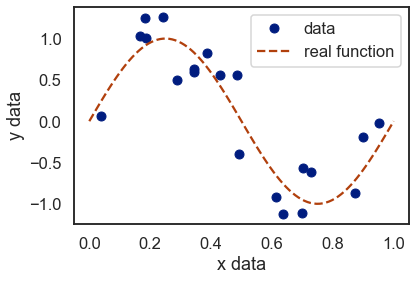

In [120]:
sns.set_style('white')
sns.set_context('talk')
sns.set_palette('dark')

# Plot of the noisy (sparse)
ax = data.set_index('x')['y'].plot(ls='', marker='o', label='data')
ax.plot(X_real, Y_real, ls='--', marker='', label='real function')

ax.legend()
ax.set(xlabel='x data', ylabel='y data')

## Question 2


* Using the `PolynomialFeatures` class from Scikit-learn's preprocessing library, create 20th order polynomial features.
* Fit this data using linear regression. 
* Plot the resulting predicted value compared to the calculated data.

Note that `PolynomialFeatures` requires either a dataframe (with one column, not a Series) or a 2D array of dimension (`X`, 1), where `X` is the length.

[Text(0.5, 0, 'x data'), Text(0, 0.5, 'y data')]

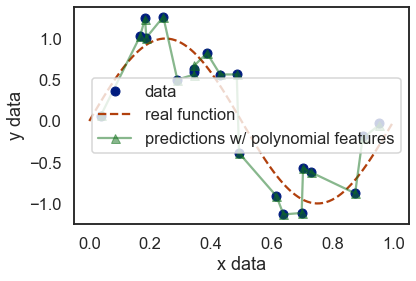

In [121]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# Setup the polynomial features
degree = 20
pf = PolynomialFeatures(degree)
lr = LinearRegression()

# Extract the X- and Y- data from the dataframe 
X_data = data[['x']]
Y_data = data['y']

# Create the features and fit the model
X_poly = pf.fit_transform(X_data)
lr = lr.fit(X_poly, Y_data)
Y_pred = lr.predict(X_poly)

# Plot the result
plt.plot(X_data, Y_data, marker='o', ls='', label='data', alpha=1)
plt.plot(X_real, Y_real, ls='--', label='real function')
plt.plot(X_data, Y_pred, marker='^', alpha=.5, label='predictions w/ polynomial features')
plt.legend()
ax = plt.gca()
ax.set(xlabel='x data', ylabel='y data')

## Question 3

* Perform the regression on using the data with polynomial features using ridge regression ($\alpha$=0.001) and lasso regression ($\alpha$=0.0001). 
* Plot the results, as was done in Question 1. 
* Also plot the magnitude of the coefficients obtained from these regressions, and compare them to those obtained from linear regression in the previous question. The linear regression coefficients will likely need a separate plot (or their own y-axis) due to their large magnitude. 

What does the comparatively large magnitude of the data tell you about the role of regularization?

[Text(0.5, 0, 'x data'), Text(0, 0.5, 'y data')]

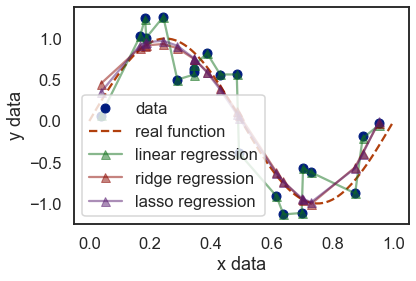

In [122]:
# Mute the sklearn warning about regularization
import warnings
warnings.filterwarnings('ignore', module='sklearn')

from sklearn.linear_model import Ridge, Lasso

# The ridge regression model
rr = Ridge(alpha=0.001)
rr = rr.fit(X_poly, Y_data)
Y_pred_rr = rr.predict(X_poly)

# The lasso regression model
lassor = Lasso(alpha=0.0001)
lassor = lassor.fit(X_poly, Y_data)
Y_pred_lr = lassor.predict(X_poly)

# The plot of the predicted values
plt.plot(X_data, Y_data, marker='o', ls='', label='data')
plt.plot(X_real, Y_real, ls='--', label='real function')
plt.plot(X_data, Y_pred, label='linear regression', marker='^', alpha=.5)
plt.plot(X_data, Y_pred_rr, label='ridge regression', marker='^', alpha=.5)
plt.plot(X_data, Y_pred_lr, label='lasso regression', marker='^', alpha=.5)

plt.legend()

ax = plt.gca()
ax.set(xlabel='x data', ylabel='y data')

In [123]:
# let's look at the absolute value of coefficients for each model

coefficients = pd.DataFrame()
coefficients['linear regression'] = lr.coef_.ravel()
coefficients['ridge regression'] = rr.coef_.ravel()
coefficients['lasso regression'] = lassor.coef_.ravel()
coefficients = coefficients.applymap(abs)

coefficients.describe()  # Huge difference in scale between non-regularized vs regularized regression

,linear regression,ridge regression,lasso regression
count,2.100000e+01,21.000000,21.000000
mean,5.787139e+13,2.169397,2.167284
std,5.994042e+13,2.900278,4.706731
min,1.619308e+07,0.000000,0.000000
25%,3.414772e+12,0.467578,0.000000
50%,3.634503e+13,1.017272,0.252181
75%,1.064203e+14,2.883507,1.641353
max,1.643575e+14,12.429635,20.176708


In [126]:
(coefficients>0).sum()  # How many coefficients are removed by regularization?
# Lasso removed 6 and ridge removed 1

linear regression    21
ridge regression     20
lasso regression     15
dtype: int64

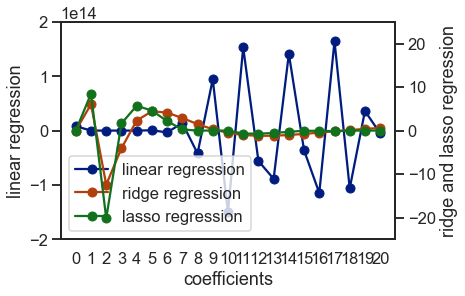

In [124]:
colors = sns.color_palette()

# Setup the dual y-axes
ax1 = plt.axes()
ax2 = ax1.twinx()

# Plot the linear regression data
ax1.plot(lr.coef_.ravel(), 
         color=colors[0], marker='o', label='linear regression')

# Plot the regularization data sets
ax2.plot(rr.coef_.ravel(), 
         color=colors[1], marker='o', label='ridge regression')

ax2.plot(lassor.coef_.ravel(), 
         color=colors[2], marker='o', label='lasso regression')

# Customize axes scales
ax1.set_ylim(-2e14, 2e14)
ax2.set_ylim(-25, 25)

# Combine the legends
h1, l1 = ax1.get_legend_handles_labels()
h2, l2 = ax2.get_legend_handles_labels()
ax1.legend(h1+h2, l1+l2)

ax1.set(xlabel='coefficients',ylabel='linear regression')
ax2.set(ylabel='ridge and lasso regression')

ax1.set_xticks(range(len(lr.coef_)))

## Question 4

For the remaining questions, we will be working with the [data set](https://www.kaggle.com/c/house-prices-advanced-regression-techniques) from last lesson, which is based on housing prices in Ames, Iowa. There are an extensive number of features--see the exercises from week three for a discussion of these features.

To begin:

* Import the data with Pandas, remove any null values, and one hot encode categoricals. Either Scikit-learn's feature encoders or Pandas `get_dummies` method can be used.
* Split the data into train and test sets. 
* Log transform skewed features. 
* Scaling can be attempted, although it can be interesting to see how well regularization works without scaling features.

In [127]:
filepath = 'Ames_Housing_Sales.csv'
data = pd.read_csv(filepath, sep=',')

Create a list of categorial data and one-hot encode. Pandas one-hot encoder (`get_dummies`) works well with data that is defined as a categorical.

In [128]:
# Get a Pd.Series consisting of all the string categoricals
one_hot_encode_cols = data.dtypes[data.dtypes == np.object]  # filtering by string categoricals
one_hot_encode_cols = one_hot_encode_cols.index.tolist()  # list of categorical fields

# Here we see another way of one-hot-encoding:
# Encode these columns as categoricals so one hot encoding works on split data (if desired)
for col in one_hot_encode_cols:
    data[col] = pd.Categorical(data[col])

# Do the one hot encoding
data = pd.get_dummies(data, columns=one_hot_encode_cols)

Next, split the data in train and test data sets.

In [131]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(data, test_size=0.3, random_state=42)

There are a number of columns that have skewed features--a log transformation can be applied to them. Note that this includes the `SalePrice`, our predictor. However, let's keep that one as is.

In [132]:
# Create a list of float colums to check for skewing
mask = data.dtypes == np.float
float_cols = data.columns[mask]

In [133]:
skew_limit = 0.75
skew_vals = train[float_cols].skew()

skew_cols = (skew_vals
             .sort_values(ascending=False)
             .to_frame()
             .rename(columns={0:'Skew'})
             .query('abs(Skew) > {0}'.format(skew_limit)))

skew_cols

,Skew
MiscVal,26.915364
PoolArea,15.777668
LotArea,11.501694
LowQualFinSF,11.210638
3SsnPorch,10.150612
ScreenPorch,4.599803
BsmtFinSF2,4.466378
EnclosedPorch,3.218303
LotFrontage,3.138032
MasVnrArea,2.492814


Transform all the columns where the skew is greater than 0.75, excluding "SalePrice".

Text(0.5, 0.98, 'Field "BsmtFinSF1"')

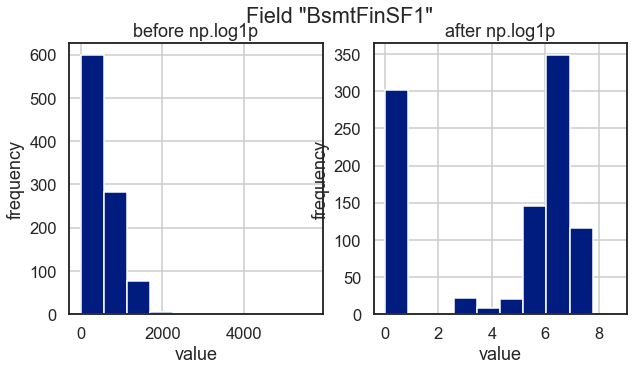

In [134]:
# OPTIONAL: Let's look at what happens to one of these features, when we apply np.log1p visually.

field = "BsmtFinSF1"
fig, (ax_before, ax_after) = plt.subplots(1, 2, figsize=(10, 5))
train[field].hist(ax=ax_before)
train[field].apply(np.log1p).hist(ax=ax_after)
ax_before.set(title='before np.log1p', ylabel='frequency', xlabel='value')
ax_after.set(title='after np.log1p', ylabel='frequency', xlabel='value')
fig.suptitle('Field "{}"'.format(field))
# a little bit better

In [135]:
# Mute the setting wtih a copy warnings
pd.options.mode.chained_assignment = None

for col in skew_cols.index.tolist():
    if col == "SalePrice":
        continue
    train[col] = np.log1p(train[col])
    test[col]  = test[col].apply(np.log1p)  # same thing

Separate features from predictor.

In [136]:
feature_cols = [x for x in train.columns if x != 'SalePrice']
X_train = train[feature_cols]
y_train = train['SalePrice']

X_test  = test[feature_cols]
y_test  = test['SalePrice']

## Question 5

* Write a function **`rmse`** that takes in truth and prediction values and returns the root-mean-squared error. Use sklearn's `mean_squared_error`.  


In [137]:
from sklearn.metrics import mean_squared_error


def rmse(ytrue, ypredicted):
    return np.sqrt(mean_squared_error(ytrue, ypredicted))

* Fit a basic linear regression model
* print the root-mean-squared error for this model
* plot the predicted vs actual sale price based on the model.  

In [138]:
from sklearn.linear_model import LinearRegression

linearRegression = LinearRegression().fit(X_train, y_train)

linearRegression_rmse = rmse(y_test, linearRegression.predict(X_test))

print(linearRegression_rmse)

306369.68342321174


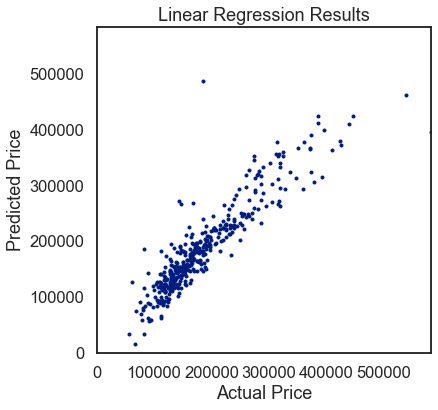

In [139]:
f = plt.figure(figsize=(6,6))
ax = plt.axes()

ax.plot(y_test, linearRegression.predict(X_test), 
         marker='o', ls='', ms=3.0)

lim = (0, y_test.max())

ax.set(xlabel='Actual Price', 
       ylabel='Predicted Price', 
       xlim=lim,
       ylim=lim,
       title='Linear Regression Results')

## Question 6

Ridge regression uses L2 normalization to reduce the magnitude of the coefficients. This can be helpful in situations where there is high variance. The regularization functions in Scikit-learn each contain versions that have cross-validation built in.

* Fit a regular (non-cross validated) Ridge model to a range of $\alpha$ values and plot the RMSE using the cross validated error function you created above.
* Use $$[0.005, 0.05, 0.1, 0.3, 1, 3, 5, 10, 15, 30, 80]$$ as the range of alphas.
* Then repeat the fitting of the Ridge models using the range of $\alpha$ values from the prior section. Compare the results.

Now for the `RidgeCV` method. It's not possible to get the alpha values for the models that weren't selected, unfortunately. The resulting error values and $\alpha$ values are very similar to those obtained above.

In [140]:
from sklearn.linear_model import RidgeCV

alphas = [0.005, 0.05, 0.1, 0.3, 1, 3, 5, 10, 15, 30, 80]

ridgeCV = RidgeCV(alphas=alphas, 
                  cv=4).fit(X_train, y_train)

ridgeCV_rmse = rmse(y_test, ridgeCV.predict(X_test))

print(ridgeCV.alpha_, ridgeCV_rmse)

15.0 32169.17620567246


## Question 7


Much like the `RidgeCV` function, there is also a `LassoCV` function that uses an L1 regularization function and cross-validation. L1 regularization will selectively shrink some coefficients, effectively performing feature elimination.

The `LassoCV` function does not allow the scoring function to be set. However, the custom error function (`rmse`) created above can be used to evaluate the error on the final model.

Similarly, there is also an elastic net function with cross validation, `ElasticNetCV`, which is a combination of L2 and L1 regularization.

* Fit a Lasso model using cross validation and determine the optimum value for $\alpha$ and the RMSE using the function created above. Note that the magnitude of $\alpha$ may be different from the Ridge model.
* Repeat this with the Elastic net model.
* Compare the results via table and/or plot.

Use the following alphas:  
`[1e-5, 5e-5, 0.0001, 0.0005]`

In [143]:
from sklearn.linear_model import LassoCV

alphas2 = np.array([1e-5, 5e-5, 0.0001, 0.0005, 0.005, 0.05, 0.1, 1, 5, 10, 20, 50, 100, 120, 150, 200, 250, 300, 400, 500, 750, 1000])

lassoCV = LassoCV(alphas=alphas2,
                  max_iter=5e4,
                  cv=3).fit(X_train, y_train)

lassoCV_rmse = rmse(y_test, lassoCV.predict(X_test))

print(lassoCV.alpha_, lassoCV_rmse)  # Lasso is slower

200.0 34205.70657881259


We can determine how many of these features remain non-zero.

In [144]:
print('Of {} coefficients, {} are non-zero with Lasso.'.format(len(lassoCV.coef_), 
                                                               len(lassoCV.coef_.nonzero()[0])))

Of 294 coefficients, 83 are non-zero with Lasso.


Now try the elastic net, with the same alphas as in Lasso, and l1_ratios between 0.1 and 0.9

In [145]:
from sklearn.linear_model import ElasticNetCV

l1_ratios = np.linspace(0.1, 0.9, 9)

elasticNetCV = ElasticNetCV(alphas=alphas2, 
                            l1_ratio=l1_ratios,
                            max_iter=1e4).fit(X_train, y_train)
elasticNetCV_rmse = rmse(y_test, elasticNetCV.predict(X_test))

print(elasticNetCV.alpha_, elasticNetCV.l1_ratio_, elasticNetCV_rmse)

0.05 0.7000000000000001 32178.85012110266


Comparing the RMSE calculation from all models is easiest in a table.

In [146]:
rmse_vals = [linearRegression_rmse, ridgeCV_rmse, lassoCV_rmse, elasticNetCV_rmse]

labels = ['Linear', 'Ridge', 'Lasso', 'ElasticNet']

rmse_df = pd.Series(rmse_vals, index=labels).to_frame()
rmse_df.rename(columns={0: 'RMSE'}, inplace=1)
rmse_df

,RMSE
Linear,306369.683423
Ridge,32169.176206
Lasso,34205.706579
ElasticNet,32178.850121


We can also make a plot of actual vs predicted housing prices as before.

[Text(0.5, 0, 'Actual Price'),
 Text(0, 0.5, 'Predicted Price'),
 Text(0.5, 1.0, 'Linear Regression Results')]

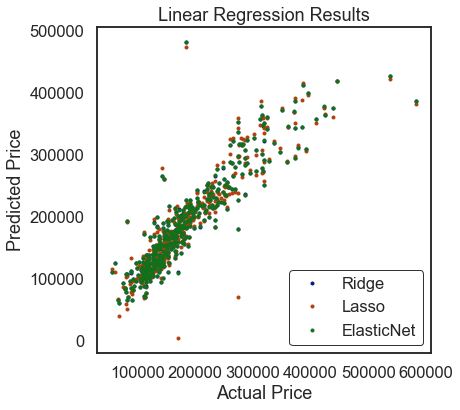

In [147]:
f = plt.figure(figsize=(6,6))
ax = plt.axes()

labels = ['Ridge', 'Lasso', 'ElasticNet']

models = [ridgeCV, lassoCV, elasticNetCV]

for mod, lab in zip(models, labels):
    ax.plot(y_test, mod.predict(X_test), 
             marker='o', ls='', ms=3.0, label=lab)


leg = plt.legend(frameon=True)
leg.get_frame().set_edgecolor('black')
leg.get_frame().set_linewidth(1.0)

ax.set(xlabel='Actual Price', 
       ylabel='Predicted Price', 
       title='Linear Regression Results')

## Question 8

Let's explore Stochastic gradient descent in this exercise.  
Recall that Linear models in general are sensitive to scaling.
However, SGD is *very* sensitive to scaling.  
Moreover, a high value of learning rate can cause the algorithm to diverge, whereas a too low value may take too long to converge.

* Fit a stochastic gradient descent model without a regularization penalty (the relevant parameter is `penalty`).
* Now fit stochastic gradient descent models with each of the three penalties (L2, L1, Elastic Net) using the parameter values determined by cross validation above. 
* Do not scale the data before fitting the model.  
* Compare the results to those obtained without using stochastic gradient descent.

In [ ]:
# Import SGDRegressor and prepare the parameters

from sklearn.linear_model import SGDRegressor

model_parameters_dict = {
    'Linear': {'penalty': 'none'},
    'Lasso': {'penalty': 'l2',
           'alpha': lassoCV.alpha_},
    'Ridge': {'penalty': 'l1',
           'alpha': ridgeCV_rmse},
    'ElasticNet': {'penalty': 'elasticnet', 
                   'alpha': elasticNetCV.alpha_,
                   'l1_ratio': elasticNetCV.l1_ratio_}
}

new_rmses = {}
for modellabel, parameters in model_parameters_dict.items():
    # following notation passes the dict items as arguments
    SGD = SGDRegressor(**parameters)
    SGD.fit(X_train, y_train)
    new_rmses[modellabel] = rmse(y_test, SGD.predict(X_test))

rmse_df['RMSE-SGD'] = pd.Series(new_rmses)
rmse_df

Notice how high the error values are! The algorithm is diverging. This can be due to scaling and/or learning rate being too high. Let's adjust the learning rate and see what happens.

* Pass in `eta0=1e-7` when creating the instance of `SGDClassifier`.
* Re-compute the errors for all the penalties and compare.

In [ ]:
# Import SGDRegressor and prepare the parameters

from sklearn.linear_model import SGDRegressor

model_parameters_dict = {
    'Linear': {'penalty': 'none'},
    'Lasso': {'penalty': 'l2',
           'alpha': lassoCV.alpha_},
    'Ridge': {'penalty': 'l1',
           'alpha': ridgeCV_rmse},
    'ElasticNet': {'penalty': 'elasticnet', 
                   'alpha': elasticNetCV.alpha_,
                   'l1_ratio': elasticNetCV.l1_ratio_}
}

new_rmses = {}
for modellabel, parameters in model_parameters_dict.items():
    # following notation passes the dict items as arguments
    SGD = SGDRegressor(eta0=1e-7, **parameters)
    SGD.fit(X_train, y_train)
    new_rmses[modellabel] = rmse(y_test, SGD.predict(X_test))

rmse_df['RMSE-SGD-learningrate'] = pd.Series(new_rmses)
rmse_df

Now let's scale our training data and try again.

* Fit a `MinMaxScaler` to `X_train` create a variable `X_train_scaled`.
* Using the scaler, transform `X_test` and create a variable `X_test_scaled`. 
* Apply the same versions of SGD to them and compare the results. Don't pass in a eta0 this time.

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

new_rmses = {}
for modellabel, parameters in model_parameters_dict.items():
    # following notation passes the dict items as arguments
    SGD = SGDRegressor(**parameters)
    SGD.fit(X_train_scaled, y_train)
    new_rmses[modellabel] = rmse(y_test, SGD.predict(X_test_scaled))

rmse_df['RMSE-SGD-scaled'] = pd.Series(new_rmses)
rmse_df

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

new_rmses = {}
for modellabel, parameters in model_parameters_dict.items():
    # following notation passes the dict items as arguments
    SGD = SGDRegressor(**parameters)
    SGD.fit(X_train_scaled, y_train)
    new_rmses[modellabel] = rmse(y_test, SGD.predict(X_test_scaled))

rmse_df['RMSE-SGD-scaled'] = pd.Series(new_rmses)
rmse_df

---

### Details of regularization

<img src = "Regularization Details.jpg">
<img src = "Regularization Details1.jpg">
<img src = "Regularization Details2.jpg">
<img src = "Regularization Details3.jpg">
<img src = "Regularization Details4.jpg">
<img src = "Regularization Details5.jpg">
<img src = "Regularization Details6.jpg">

# Machine Learning Foundation

## Section 2, Part e: Regularization LAB 

## Learning objectives

By the end of this lesson, you will be able to:

* Implement data standardization
* Implement variants of regularized regression
* Combine data standardization with the train-test split procedure
* Implement regularization to prevent overfitting in regression problems

In [149]:
import numpy as np
import pandas as pd

np.set_printoptions(precision=3, suppress=True)

### Loading in Boston Data

**Note:** See `helper.py` file to see how boston data is read in from SciKit Learn.

In [150]:
boston = boston_dataframe(description=True)
boston_data = boston[0]
boston_description = boston[1]

## Data standardization

**Standardizing** data refers to transforming each variable so that it more closely follows a **standard** normal distribution, with mean 0 and standard deviation 1.

The [`StandardScaler`](http://scikit-learn.org/dev/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler) object in SciKit Learn can do this.

**Generate X and y**:

In [151]:
y_col = "MEDV"

X = boston_data.drop(y_col, axis=1)
y = boston_data[y_col]

**Import, fit, and transform using `StandardScaler`**

In [152]:
from sklearn.preprocessing import StandardScaler

s = StandardScaler()
X_ss = s.fit_transform(X)

### Exercise: 

Confirm standard scaling

In [153]:
a = np.array([[1, 2, 3], 
              [4, 5, 6]]) 
print(a) # 2 rows, 3 columns

[[1 2 3]
 [4 5 6]]


In [154]:
a.mean(axis=0) # mean along the *columns*

array([2.5, 3.5, 4.5])

In [155]:
a.mean(axis=1) # mean along the *rows*

array([2., 5.])

In [156]:
X2 = np.array(X)
man_transform = (X2-X2.mean(axis=0))/X2.std(axis=0)
np.allclose(man_transform, X_ss)

True

### Coefficients with and without scaling

In [157]:
from sklearn.linear_model import LinearRegression

In [158]:
lr = LinearRegression()

y_col = "MEDV"

X = boston_data.drop(y_col, axis=1)
y = boston_data[y_col]

In [159]:
lr.fit(X, y)
print(lr.coef_) # min = -18

[ -0.108   0.046   0.021   2.687 -17.767   3.81    0.001  -1.476   0.306
  -0.012  -0.953   0.009  -0.525]


#### Discussion (together): 

The coefficients are on widely different scales. Is this "bad"?

In [160]:
from sklearn.preprocessing import StandardScaler

In [161]:
s = StandardScaler()
X_ss = s.fit_transform(X)

In [162]:
lr2 = LinearRegression()
lr2.fit(X_ss, y)
print(lr2.coef_) # coefficients now "on the same scale"

[-0.928  1.082  0.141  0.682 -2.057  2.674  0.019 -3.104  2.662 -2.077
 -2.061  0.849 -3.744]


### Exercise: 

Based on these results, what is the most "impactful" feature (this is intended to be slightly ambiguous)? "In what direction" does it affect "y"?

**Hint:** Recall from last week that we can "zip up" the names of the features of a DataFrame `df` with a model `model` fitted on that DataFrame using:

```python
dict(zip(df.columns.values, model.coef_))
```

In [163]:
pd.DataFrame(zip(X.columns, lr2.coef_)).sort_values(by=1)

,0,1
12,LSTAT,-3.743627
7,DIS,-3.104044
9,TAX,-2.076782
10,PTRATIO,-2.060607
4,NOX,-2.056718
0,CRIM,-0.928146
6,AGE,0.019466
2,INDUS,0.140900
3,CHAS,0.681740
11,B,0.849268


Looking just at the strength of the standardized coefficients LSTAT, DIS, RM and RAD are all the 'most impactful'. Sklearn does not have built in statistical signifigance of each of these variables which would aid in making this claim stronger/weaker

### Lasso with and without scaling

We discussed Lasso in lecture. 

Let's review together:

1. What is different about Lasso vs. regular Linear Regression?
1. Is standardization more or less important with Lasso vs. Linear Regression? Why?

In [164]:
from sklearn.linear_model import Lasso
from sklearn.preprocessing import PolynomialFeatures

#### Create polynomial features

[`PolynomialFeatures`](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html)

In [165]:
pf = PolynomialFeatures(degree=2, include_bias=False,)
X_pf = pf.fit_transform(X)

**Note:** We use `include_bias=False` since `Lasso` includes a bias by default.

In [166]:
X_pf_ss = s.fit_transform(X_pf)

### Lasso

[`Lasso` documentation](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html)

In [167]:
las = Lasso()
las.fit(X_pf_ss, y)
las.coef_ 

array([-0.   ,  0.   , -0.   ,  0.   , -0.   ,  0.   , -0.   , -0.   ,
       -0.   , -0.   , -0.991,  0.   , -0.   , -0.   ,  0.   , -0.   ,
        0.068, -0.   , -0.   , -0.   , -0.   , -0.   , -0.   , -0.   ,
       -0.   , -0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,
        0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   , -0.   ,  0.   ,
       -0.   , -0.   , -0.   , -0.05 , -0.   , -0.   , -0.   , -0.   ,
       -0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,
        0.   ,  0.   ,  0.   , -0.   , -0.   , -0.   , -0.   , -0.   ,
       -0.   , -0.   ,  0.   , -0.   ,  3.3  , -0.   , -0.   , -0.   ,
       -0.   , -0.   ,  0.42 , -3.498, -0.   , -0.   , -0.   , -0.   ,
       -0.   ,  0.   , -0.   , -0.   , -0.   , -0.146, -0.   , -0.   ,
       -0.   , -0.   , -0.   , -0.   , -0.   , -0.   , -0.   , -0.   ,
       -0.   , -0.   , -0.   ,  0.   , -0.   ,  0.   , -0.   , -0.   ])

### Exercise

Compare 

* Sum of magnitudes of the coefficients
* Number of coefficients that are zero

for Lasso with alpha 0.1 vs. 1.

Before doing the exercise, answer the following questions in one sentence each:

* Which do you expect to have greater magnitude?
* Which do you expect to have more zeros?

In [168]:
las01 = Lasso(alpha = 0.1)
las01.fit(X_pf_ss, y)
print('sum of coefficients:', abs(las01.coef_).sum() )
print('number of coefficients not equal to 0:', (las01.coef_!=0).sum())

sum of coefficients: 26.138682362877965
number of coefficients not equal to 0: 23


In [169]:
las1 = Lasso(alpha = 1)
las1.fit(X_pf_ss, y)
print('sum of coefficients:',abs(las1.coef_).sum() )
print('number of coefficients not equal to 0:',(las1.coef_!=0).sum())

sum of coefficients: 8.47240504455307
number of coefficients not equal to 0: 7


With more regularization (higher alpha) we will expect the penalty for higher weights to be greater and thus the coefficients to be pushed down. Thus a higher alpha means lower magnitude with more coefficients pushed down to 0.

### Exercise: $R^2$

Calculate the $R^2$ of each model without train/test split.

Recall that we import $R^2$ using:

```python
from sklearn.metrics import r2_score
```

In [170]:
from sklearn.metrics import r2_score
r2_score(y,las.predict(X_pf_ss))

0.7207000417838496

#### Discuss:

Will regularization ever increase model performance if we evaluate on the same dataset that we trained on?

## With train/test split

#### Discuss

Are there any issues with what we've done so far?

**Hint:** Think about the way we have done feature scaling.

Discuss in groups of two or three.

In [171]:
from sklearn.model_selection import train_test_split

In [172]:
X_train, X_test, y_train, y_test = train_test_split(X_pf, y, test_size=0.3, 
                                                    random_state=72018)

In [173]:
X_train_s = s.fit_transform(X_train)
las.fit(X_train_s, y_train)
X_test_s = s.transform(X_test)
y_pred = las.predict(X_test_s)
r2_score(y_pred, y_test)

0.33177406838134416

In [174]:
X_train_s = s.fit_transform(X_train)
las01.fit(X_train_s, y_train)
X_test_s = s.transform(X_test)
y_pred = las01.predict(X_test_s)
r2_score(y_pred, y_test)

0.7102444090776476

### Exercise


#### Part 1:

Do the same thing with Lasso of:

* `alpha` of 0.001
* Increase `max_iter` to 100000 to ensure convergence. 

Calculate the $R^2$ of the model.

Feel free to copy-paste code from above, but write a one sentence comment above each line of code explaining why you're doing what you're doing.

#### Part 2:

Do the same procedure as before, but with Linear Regression.

Calculate the $R^2$ of this model.

#### Part 3: 

Compare the sums of the absolute values of the coefficients for both models, as well as the number of coefficients that are zero. Based on these measures, which model is a "simpler" description of the relationship between the features and the target?

In [175]:
# Part 1

# Decreasing regularization and ensuring convergence
las001 = Lasso(alpha = 0.001, max_iter=100000)

# Transforming training set to get standardized units
X_train_s = s.fit_transform(X_train)

# Fitting model to training set
las001.fit(X_train_s, y_train)

# Transforming test set using the parameters defined from training set
X_test_s = s.transform(X_test)

# Finding prediction on test set
y_pred = las001.predict(X_test_s)

# Calculating r2 score
print("r2 score for alpha = 0.001:", r2_score(y_pred, y_test))


# Part 2

# Using vanilla Linear Regression
lr = LinearRegression()

# Fitting model to training set
lr.fit(X_train_s, y_train)

# predicting on test set
y_pred_lr = lr.predict(X_test_s)

# Calculating r2 score
print("r2 score for Linear Regression:", r2_score(y_pred_lr, y_test))


# Part 3
print('Magnitude of Lasso coefficients:', abs(las001.coef_).sum())
print('Number of coeffients not equal to 0 for Lasso:', (las001.coef_!=0).sum())

print('Magnitude of Linear Regression coefficients:', abs(lr.coef_).sum())
print('Number of coeffients not equal to 0 for Linear Regression:', (lr.coef_!=0).sum())

r2 score for alpha = 0.001: 0.8686454101886707
r2 score for Linear Regression: 0.8555202098064162
Magnitude of Lasso coefficients: 436.26164263065647
Number of coeffients not equal to 0 for Lasso: 89
Magnitude of Linear Regression coefficients: 1185.2858254467897
Number of coeffients not equal to 0 for Linear Regression: 104


## L1 vs. L2 Regularization

As mentioned in the deck: `Lasso` and `Ridge` regression have the same syntax in SciKit Learn.

Now we're going to compare the results from Ridge vs. Lasso regression:

[`Ridge`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html)

In [ ]:
from sklearn.linear_model import Ridge

### Exercise

Following the Ridge documentation from above:

1. Define a Ridge object `r` with the same `alpha` as `las001`.
2. Fit that object on `X` and `y` and print out the resulting coefficients.

In [176]:
# Decreasing regularization and ensuring convergence
r = Ridge(alpha = 0.001)
X_train_s = s.fit_transform(X_train)
r.fit(X_train_s, y_train)
X_test_s = s.transform(X_test)
y_pred_r = r.predict(X_test_s)

# Calculating r2 score
r.coef_

array([  8.727,  10.354, -24.683,   5.299,  -3.13 ,  14.781,  22.301,
       -23.483,  27.356,  -1.512,  16.949,  22.531,  11.444,   1.055,
         0.437,  14.259,   1.83 ,  -8.737,   4.726,  -3.748,  -3.557,
       -16.521,  -6.918,   6.064,  -1.363,   4.604,  -1.303,  -0.057,
        -0.301, -12.828,   2.016,   1.084,  -0.655,  -1.092,   4.458,
        -4.247,   4.156,  -1.282,   8.71 ,  -0.285,  -8.595,  11.595,
         6.544,   1.271,   1.827,   1.007,   1.554,   5.173,  -4.685,
         5.299,  -3.199,  -8.715,   0.983,   1.119,   0.284,  -1.683,
        -2.884,   2.985,  -0.756,  12.297,   0.931,  -7.594,  18.292,
       -22.124,  35.725, -21.894,  -7.789,   1.774,   4.101, -12.263,
        -3.741,  -5.525, -16.111,  -5.706,  -4.666,  -9.884,   0.989,
        -0.092,  17.145, -14.214,  -2.955,  -2.785,  -5.404,  11.825,
         0.085,  -4.352,  -5.616,  -2.843,   0.826, -29.129,  49.636,
       -21.571,  -1.263,  -8.811, -15.822,  11.975,  -1.023,   2.911,
        -0.656,  -4.

In [177]:
las001 # same alpha as Ridge above

Lasso(alpha=0.001, max_iter=100000)

In [178]:
las001.coef_

array([  0.   ,   0.   , -16.945,   2.562,   0.   ,  13.392,   9.907,
       -19.96 ,   9.039,   0.   ,   6.138,  17.628,  11.446,   1.21 ,
         0.226,  11.578,   2.197,  -7.397,   4.117,  -1.589,  -2.157,
        -9.837,   0.   ,   0.   ,  -1.089,   3.793,   0.389,   0.2  ,
        -0.297,  -3.352,   0.396,   0.719,  -0.756,  -0.753,   2.388,
        -0.845,   2.524,  -0.973,   3.882,  -0.983,   6.609,   6.138,
         4.201,   0.858,   1.96 ,   2.661,  -4.148,   2.937,  -4.556,
         2.112,  -1.983,  -7.439,   1.607,   1.668,  -1.262,  -0.   ,
        -0.   ,   2.622,  -0.861,   3.353,  -0.   ,  -2.451,   9.171,
        -6.917,   0.   ,  -5.618,  -5.716,   0.521,   3.354,  -7.528,
        -0.   ,  -6.646, -10.212,  -6.346,  -2.95 ,  -9.559,   0.327,
         0.56 ,  11.006,  -6.666,  -1.158,  -2.25 ,  -3.53 ,   9.035,
        -0.   ,  -2.316,  -2.   ,  -1.124,   0.804, -20.861,  27.166,
         0.   ,  -1.51 ,  -6.745,  -5.098,  15.455,   0.   ,   0.   ,
         0.629,  -3.

In [179]:
print(np.sum(np.abs(r.coef_)))
print(np.sum(np.abs(las001.coef_)))

print(np.sum(r.coef_ != 0))
print(np.sum(las001.coef_ != 0))

795.6521694302279
436.26164263065647
104
89


**Conclusion:** Ridge does not make any coefficients 0. In addition, on this particular dataset, Lasso provides stronger overall regularization than Ridge for this value of `alpha` (not necessarily true in general).

In [180]:
y_pred = r.predict(X_pf_ss)
print(r2_score(y, y_pred))

y_pred = las001.predict(X_pf_ss)
print(r2_score(y, y_pred))

0.9075278340575139
0.9102933722688233


**Conclusion**: Ignoring issues of overfitting, Ridge does slightly better than Lasso when `alpha` is set to 0.001 for each (not necessarily true in general).

# Example: Does it matter when you scale?

In [181]:
X_train, X_test, y_train, y_test = train_test_split(X_ss, y, test_size=0.3, 
                                                    random_state=72018)

In [182]:
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
r2_score(y_pred, y_test)

0.5832942094971805

In [183]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, 
                                                    random_state=72018)

In [184]:
s = StandardScaler()
lr_s = LinearRegression()
X_train_s = s.fit_transform(X_train)
lr_s.fit(X_train_s, y_train)
X_test_s = s.transform(X_test)
y_pred_s = lr_s.predict(X_test_s)
r2_score(y_pred_s, y_test)

0.5832942094971799

**Conclusion:** It doesn't matter whether you scale before or afterwards, in terms of the raw predictions, for Linear Regression. However, it matters for other algorithms. Plus, as we'll see later, we can make scaling part of a `Pipeline`.

---